In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

In [ ]:
data= pd.read_csv("/content/Company_data.csv")
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [ ]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [ ]:
X= data.drop('Sales',axis=1).values


In [ ]:
TV=X[:,0]
TV

array([230.1,  44.5,  17.2, 151.5, 180.8,   8.7,  57.5, 120.2,   8.6,
       199.8,  66.1, 214.7,  23.8,  97.5, 204.1, 195.4,  67.8, 281.4,
        69.2, 147.3, 218.4, 237.4,  13.2, 228.3,  62.3, 262.9, 142.9,
       240.1, 248.8,  70.6, 292.9, 112.9,  97.2, 265.6,  95.7, 290.7,
       266.9,  74.7,  43.1, 228. , 202.5, 177. , 293.6, 206.9,  25.1,
       175.1,  89.7, 239.9, 227.2,  66.9, 199.8, 100.4, 216.4, 182.6,
       262.7, 198.9,   7.3, 136.2, 210.8, 210.7,  53.5, 261.3, 239.3,
       102.7, 131.1,  69. ,  31.5, 139.3, 237.4, 216.8, 199.1, 109.8,
        26.8, 129.4, 213.4,  16.9,  27.5, 120.5,   5.4, 116. ,  76.4,
       239.8,  75.3,  68.4, 213.5, 193.2,  76.3, 110.7,  88.3, 109.8,
       134.3,  28.6, 217.7, 250.9, 107.4, 163.3, 197.6, 184.9, 289.7,
       135.2, 222.4, 296.4, 280.2, 187.9, 238.2, 137.9,  25. ,  90.4,
        13.1, 255.4, 225.8, 241.7, 175.7, 209.6,  78.2,  75.1, 139.2,
        76.4, 125.7,  19.4, 141.3,  18.8, 224. , 123.1, 229.5,  87.2,
         7.8,  80.2,

In [ ]:
TV.shape

(200,)

In [ ]:
TV=TV.reshape(-1,1)

In [ ]:
TV.shape


(200, 1)

In [ ]:
Y=data['Sales'].values
Y

array([22.1, 10.4, 12. , 16.5, 17.9,  7.2, 11.8, 13.2,  4.8, 15.6, 12.6,
       17.4,  9.2, 13.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 17.5,
        5.6, 20.5,  9.7, 17. , 15. , 20.9, 18.9, 10.5, 21.4, 11.9, 13.2,
       17.4, 11.9, 17.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 17.9,
        8.5, 16.1, 10.6, 23.2, 19.8,  9.7, 16.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 20.7, 14. , 16. , 11.3,
       11. , 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 17.3, 11.3, 13.6, 21.7, 20.2, 12. , 16. ,
       12.9, 16.7, 14. ,  7.3, 19.4, 22.2, 11.5, 16.9, 16.7, 20.5, 25.4,
       17.2, 16.7, 23.8, 19.8, 19.7, 20.7, 15. ,  7.2, 12. ,  5.3, 19.8,
       18.4, 21.8, 17.1, 20.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 16.6, 15.2, 19.7, 10.6,  6.6, 11.9, 24.7,  9.7,  1.6, 17.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 12.3, 10.3, 18.2, 25.4, 10.9, 10.1, 16

In [ ]:
Y.shape
Y=Y.reshape(-1,1)
Y.shape


(200, 1)

In [ ]:
TV.shape,Y.shape

((200, 1), (200, 1))

Text(0, 0.5, 'NO.of sales')

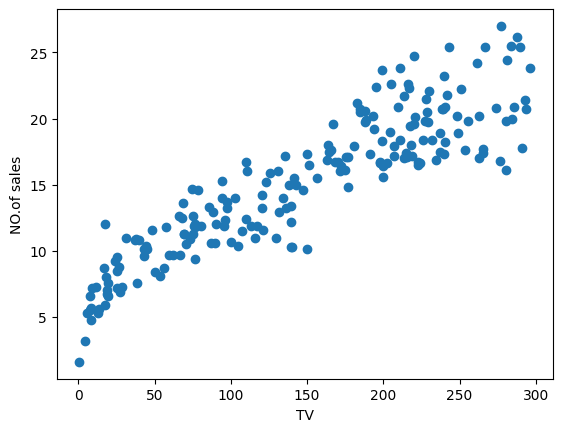

In [ ]:
plt.scatter(TV,Y)
plt.xlabel("TV")
plt.ylabel("NO.of sales")

In [ ]:
reg=linear_model.LinearRegression()
reg.fit(TV,Y)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [ ]:
Y_pred = reg.predict(TV)
Y_pred

array([[19.73726517],
       [ 9.44300377],
       [ 7.92881554],
       [15.37773421],
       [17.00285199],
       [ 7.45736499],
       [10.16404579],
       [13.6416869 ],
       [ 7.45181851],
       [18.05668263],
       [10.64104282],
       [18.88310771],
       [ 8.29488303],
       [12.38263661],
       [18.29518114],
       [17.81263764],
       [10.73533293],
       [22.5826079 ],
       [10.8129836 ],
       [15.14478218],
       [19.08832736],
       [20.142158  ],
       [ 7.70695646],
       [19.63742859],
       [10.43027669],
       [21.55650964],
       [14.90073719],
       [20.29191288],
       [20.77445638],
       [10.89063428],
       [23.22045276],
       [13.23679407],
       [12.36599718],
       [21.70626452],
       [12.28280002],
       [23.09843026],
       [21.77836873],
       [11.11803984],
       [ 9.3653531 ],
       [19.62078916],
       [18.20643751],
       [16.79208586],
       [23.2592781 ],
       [18.4504825 ],
       [ 8.36698723],
       [16

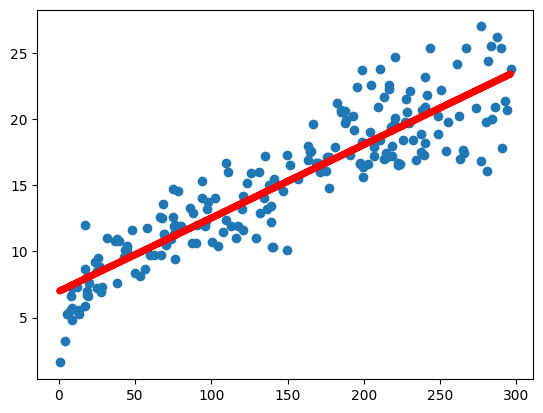

In [ ]:
plt.scatter(TV,Y)
plt.plot(TV,Y_pred,color='red',linewidth=5)

In [ ]:
print(f'MAE={mean_absolute_error(Y,Y_pred)}')
print(f'r2_score={r2_score(Y,Y_pred)}')
print(f'MSE={mean_squared_error(Y,Y_pred)}')
print(f'RMSE={np.sqrt(mean_squared_error(Y,Y_pred))}')


MAE=1.8305872641932412
r2_score=0.8121757029987414
MSE=5.2177438977951285
RMSE=2.2842381438447106


In [67]:
TV_train, TV_test, Y_train, Y_test = train_test_split(TV, Y, test_size=0.25, random_state=42)

In [69]:
TV_train.shape,TV_test.shape

((150, 1), (50, 1))

In [70]:
reg=Lasso(alpha=0.1)
reg.fit(TV_train,Y_train)

Lasso(alpha=0.1)

In [71]:
Y_pred1 = reg.predict(TV_train)
print(f'Performance of the model on training data :\n')
print(f'MAE = {mean_absolute_error(Y_train, Y_pred1)}')
print(f'MSE = {mean_squared_error(Y_train, Y_pred1)}')
print(f'RMSE = {np.sqrt(mean_squared_error(Y_train, Y_pred1))}')
print(f'R_2 = {r2_score(Y_train, Y_pred1)}')

Performance of the model on training data :

MAE = 1.8204188646711517
MSE = 5.136152679124108
RMSE = 2.2663081606710302
R_2 = 0.8111945012632855


In [72]:
Y_pred2=reg.predict(TV_test)

In [73]:
print(f'Performance of the model on testing data :\n')
print(f'MAE = {mean_absolute_error(Y_test, Y_pred2)}')
print(f'MSE = {mean_squared_error(Y_test, Y_pred2)}')
print(f'RMSE = {np.sqrt(mean_squared_error(Y_test, Y_pred2))}')
print(f'R_2 = {r2_score(Y_test, Y_pred2)}')

Performance of the model on testing data :

MAE = 1.8651204685513858
MSE = 5.513490556908362
RMSE = 2.3480823147641914
R_2 = 0.7971825651783787


In [76]:
reg=Ridge(alpha=0.1)
reg.fit(TV_train,Y_train)

Ridge(alpha=0.1)

In [77]:
Y_pred1 = reg.predict(TV_train)
print(f'Performance of the model on training data :\n')
print(f'MAE = {mean_absolute_error(Y_train, Y_pred1)}')
print(f'MSE = {mean_squared_error(Y_train, Y_pred1)}')
print(f'RMSE = {np.sqrt(mean_squared_error(Y_train, Y_pred1))}')
print(f'R_2 = {r2_score(Y_train, Y_pred1)}')

Performance of the model on training data :

MAE = 1.8203818678653265
MSE = 5.136151288979574
RMSE = 2.2663078539729713
R_2 = 0.811194552365141


In [80]:
print(f'Performance of the model on testing data :\n')
print(f'MAE = {mean_absolute_error(Y_test, Y_pred2)}')
print(f'MSE = {mean_squared_error(Y_test, Y_pred2)}')
print(f'RMSE = {np.sqrt(mean_squared_error(Y_test, Y_pred2))}')
print(f'R_2 = {r2_score(Y_test, Y_pred2)}')

Performance of the model on testing data :

MAE = 1.8651204685513858
MSE = 5.513490556908362
RMSE = 2.3480823147641914
R_2 = 0.7971825651783787
